In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [39]:
#read dataset
df = pd.read_csv('seed_dataset.csv')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [41]:
#count the number of missing (NaN) values in each column of a dataset
df.isna().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [42]:
# describe object
df.describe(include='O')

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


In [43]:
# inplace change column in the actual dataset
df.replace({'Class':{'Çerçevelik':0,'Ürgüp Sivrisi':1}},inplace=True)

In [44]:
# Checking duplicated data
print('Number of duplicated data : ' , len(df[df.duplicated()]))

Number of duplicated data :  0


In [45]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


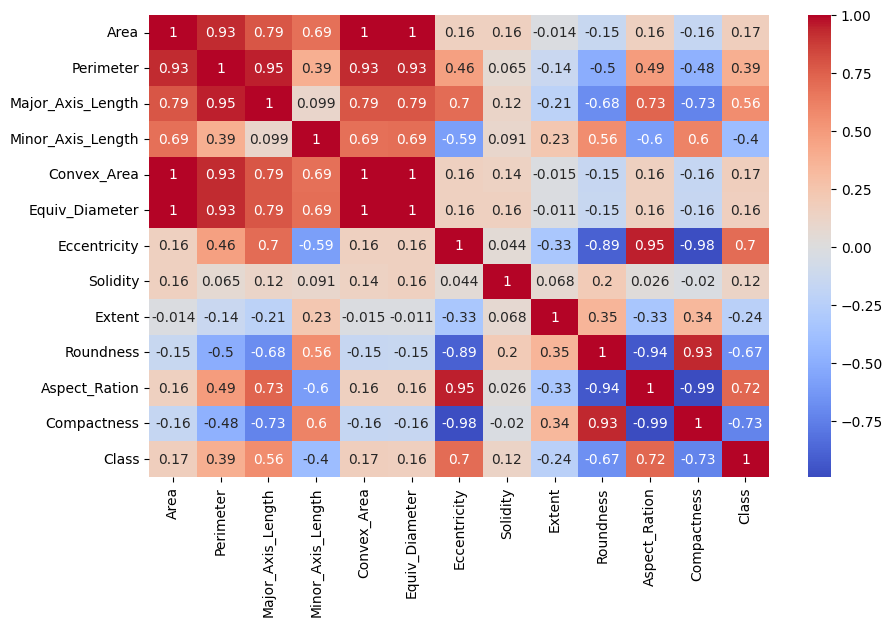

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness', 'Class']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
df = df.drop(['Convex_Area'],axis=1)
df = df.drop(['Equiv_Diameter'],axis=1)
df = df.drop(['Eccentricity'],axis=1)
df = df.drop(['Aspect_Ration'],axis=1)
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Compactness,Class
0,56276,888.242,326.1485,220.2388,0.9902,0.7453,0.8963,0.8207,0
1,76631,1068.146,417.1932,234.2289,0.9916,0.7151,0.8440,0.7487,0
2,71623,1082.987,435.8328,211.0457,0.9857,0.7400,0.7674,0.6929,0
3,66458,992.051,381.5638,222.5322,0.9902,0.7396,0.8486,0.7624,0
4,66107,998.146,383.8883,220.4545,0.9850,0.6752,0.8338,0.7557,0
...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,0.9907,0.4888,0.6672,0.5973,1
2496,69647,1084.318,462.9416,191.8210,0.9919,0.6002,0.7444,0.6433,1
2497,87994,1210.314,507.2200,222.1872,0.9920,0.7643,0.7549,0.6599,1
2498,80011,1182.947,501.9065,204.7531,0.9890,0.7374,0.7185,0.6359,1


In [48]:
remaining_features = df.columns.tolist()
num_features_extracted = len(remaining_features)

print("Number of features extracted:", num_features_extracted)
print("Extracted features:", remaining_features)


Number of features extracted: 9
Extracted features: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Solidity', 'Extent', 'Roundness', 'Compactness', 'Class']


In [49]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,0.989492,0.693205,0.791533,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,0.003494,0.060914,0.055924,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,0.918600,0.468000,0.554600,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,0.988300,0.658900,0.751900,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,0.990300,0.713050,0.797750,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,0.991500,0.740225,0.834325,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,0.994400,0.829600,0.939600,0.904900,1.0000


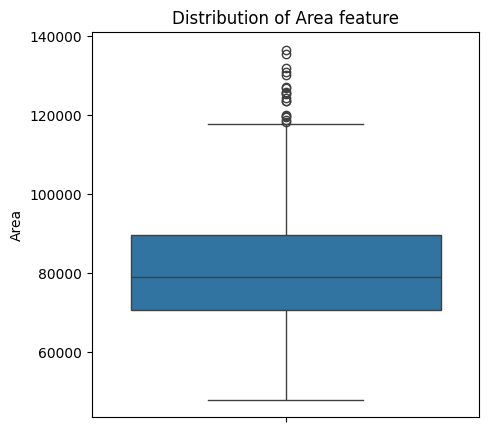

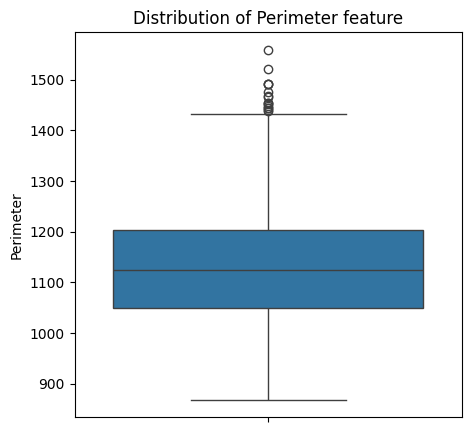

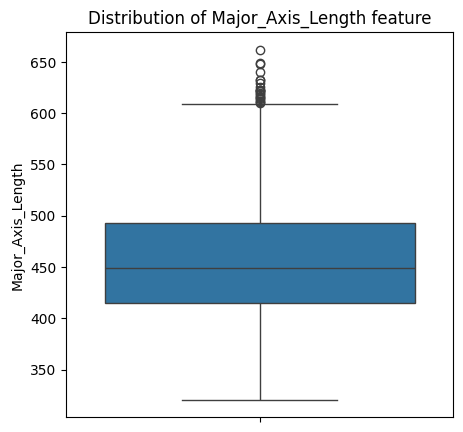

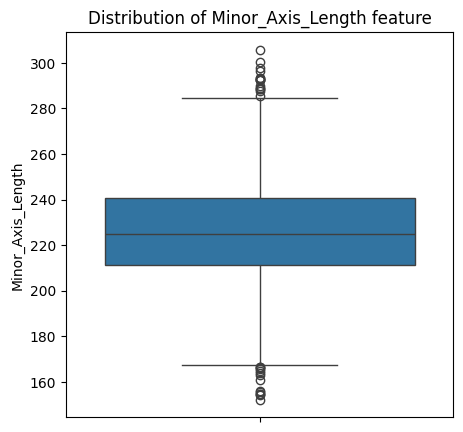

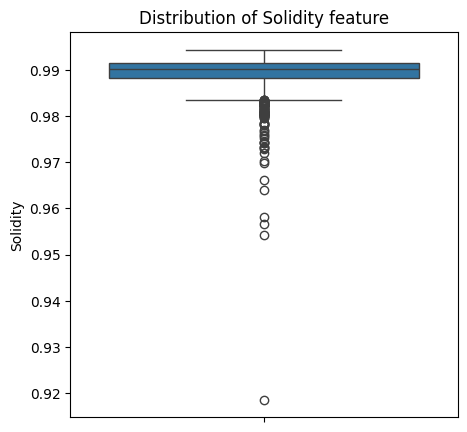

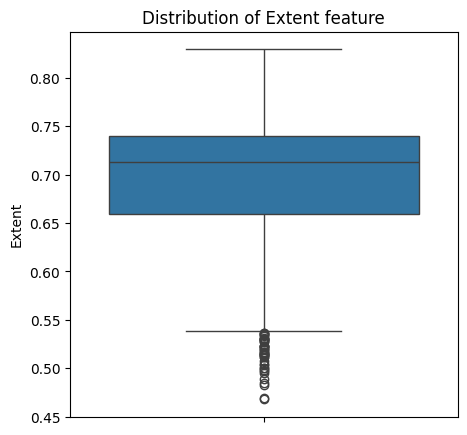

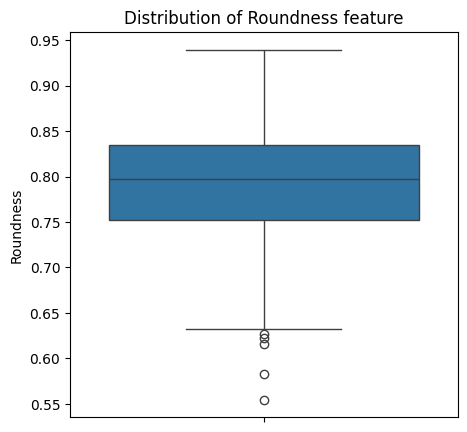

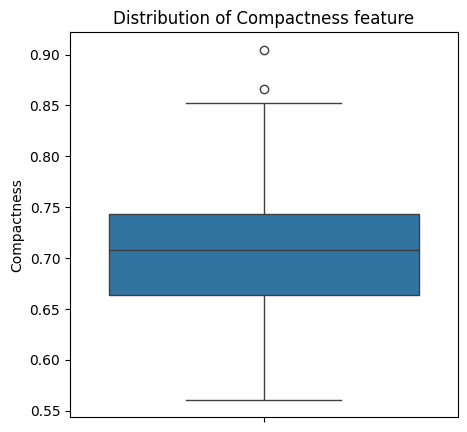

In [50]:
# Box plot to visualize outliers
plotted_columns = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Solidity', 'Extent', 'Roundness', 'Compactness']]
for col in plotted_columns.columns:
    plt.figure(figsize=(5,5))
    ax = sns.boxplot(df[col])
    ax.set_title(f'Distribution of {col} feature')
    plt.show()

In [51]:
# Fun outliers returns a list of index of outliers
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lst = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return lst

In [52]:
# Create an empty list to store the output indices from multiple columns

index_list = []
for feature in plotted_columns.columns:
    index_list.extend(outliers(df,feature))

In [53]:
# Show the rows that have outliers
index_list

[1301,
 1424,
 1539,
 1583,
 1586,
 1654,
 1708,
 1778,
 1787,
 1798,
 1854,
 1880,
 1991,
 2045,
 2160,
 2289,
 2373,
 2453,
 1301,
 1321,
 1400,
 1539,
 1583,
 1654,
 1708,
 1717,
 1747,
 1778,
 1854,
 1880,
 1991,
 2029,
 2045,
 2373,
 226,
 1301,
 1321,
 1400,
 1539,
 1583,
 1654,
 1670,
 1696,
 1708,
 1717,
 1747,
 1854,
 1880,
 2029,
 2045,
 2087,
 2088,
 2254,
 2313,
 2373,
 106,
 167,
 263,
 303,
 377,
 636,
 901,
 916,
 997,
 1028,
 1079,
 1235,
 1273,
 1345,
 1349,
 1371,
 1408,
 1685,
 1799,
 1807,
 1822,
 1828,
 1835,
 1991,
 2319,
 2417,
 2453,
 2456,
 2481,
 2490,
 43,
 48,
 80,
 101,
 104,
 108,
 109,
 114,
 128,
 131,
 138,
 144,
 148,
 154,
 169,
 187,
 207,
 221,
 229,
 318,
 349,
 363,
 366,
 378,
 481,
 494,
 497,
 501,
 517,
 547,
 561,
 564,
 577,
 602,
 615,
 617,
 631,
 688,
 756,
 777,
 797,
 813,
 814,
 819,
 840,
 847,
 873,
 937,
 972,
 978,
 1000,
 1013,
 1019,
 1036,
 1091,
 1101,
 1115,
 1133,
 1136,
 1140,
 1167,
 1198,
 1209,
 1228,
 1265,
 1295,
 1363,

In [54]:
# Fun to return a cleaned dataframe without outliers

def remove(df,lst):
    # Make some processes on index_list to make it unique and sorted
    lst = sorted(set(lst))
    df = df.drop(lst)
    return df

In [55]:
df_cleaned = remove(df,index_list)

In [56]:
df_cleaned.shape

(2298, 9)

In [57]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Separate target variable (Class) from features (X)
Y=df['Class']
X=df.drop(columns=['Class'])

display(X)
display(Y)

# Split dataset into training set, validation, and test set
# Stratify takes the same proportion for the training and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X , Y , test_size=0.3 , stratify=Y , random_state=42,  shuffle= True) #70% training, 15% validation, 15% test

# Further split the temporary set (X_temp, y_temp) into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Extent,Roundness,Compactness
0,56276,888.242,326.1485,220.2388,0.9902,0.7453,0.8963,0.8207
1,76631,1068.146,417.1932,234.2289,0.9916,0.7151,0.8440,0.7487
2,71623,1082.987,435.8328,211.0457,0.9857,0.7400,0.7674,0.6929
3,66458,992.051,381.5638,222.5322,0.9902,0.7396,0.8486,0.7624
4,66107,998.146,383.8883,220.4545,0.9850,0.6752,0.8338,0.7557
...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,0.9907,0.4888,0.6672,0.5973
2496,69647,1084.318,462.9416,191.8210,0.9919,0.6002,0.7444,0.6433
2497,87994,1210.314,507.2200,222.1872,0.9920,0.7643,0.7549,0.6599
2498,80011,1182.947,501.9065,204.7531,0.9890,0.7374,0.7185,0.6359


0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

In [58]:
# Calculate number of samples in each set
num_samples_train = len(X_train)
num_samples_val = len(X_val)
num_samples_test = len(X_test)

print("Number of samples in training set:", num_samples_train)
print("Number of samples in validation set:", num_samples_val)
print("Number of samples in testing set:", num_samples_test)

Number of samples in training set: 1750
Number of samples in validation set: 375
Number of samples in testing set: 375


In [59]:
y_train_df = pd.DataFrame(y_train, columns=['Class'])
y_test_df = pd.DataFrame(y_test, columns=['Class'])

print(df["Class"].value_counts())
print("\n")
print(y_train_df["Class"].value_counts())
print("\n")
print(y_test_df["Class"].value_counts())

Class
0    1300
1    1200
Name: count, dtype: int64


Class
0    910
1    840
Name: count, dtype: int64


Class
0    195
1    180
Name: count, dtype: int64


In [60]:
# Create DataFrames for target variable in training and testing sets
y_train_df = pd.DataFrame(y_train, columns=['Class'])
y_test_df = pd.DataFrame(y_test, columns=['Class'])

# Print value counts of 'Class' in original dataset and training/testing sets
print("Original Dataset Class Distribution:")
print(df["Class"].value_counts())
print("\nTraining Set Class Distribution:")
print(y_train_df["Class"].value_counts())
print("\nTesting Set Class Distribution:")
print(y_test_df["Class"].value_counts())


Original Dataset Class Distribution:
Class
0    1300
1    1200
Name: count, dtype: int64

Training Set Class Distribution:
Class
0    910
1    840
Name: count, dtype: int64

Testing Set Class Distribution:
Class
0    195
1    180
Name: count, dtype: int64


In [61]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, splitter='best', random_state=42)

# Access and display the hyperparameters of the trained DecisionTreeClassifier
print("Decision Tree Hyperparameters:")
print("Criterion:", dt_classifier.criterion)
print("Max Depth:", dt_classifier.max_depth)
print("Min Samples Split:", dt_classifier.min_samples_split)
print("Min Samples Leaf:", dt_classifier.min_samples_leaf)
print("Splitter:", dt_classifier.splitter)

# Perform cross-validation to evaluate model performance
num_folds = 5  # Number of cross-validation folds
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=num_folds)

# Calculate training/validation ratios
training_ratio = 1.0 - (1.0 / num_folds)
validation_ratio = 1.0 / num_folds

# Print cross-validation scores and ratios
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Number of Folds:", num_folds)
print("Training Ratio (per fold):", training_ratio)
print("Validation Ratio (per fold):", validation_ratio)

# Train the Decision Tree model using the training sets
dt_classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt = dt_classifier.predict(X_test)

# Model Accuracy: how often is the classifier correct?
test_accuracy = metrics.accuracy_score(y_test, y_pred_dt)
print("Decision Tree Model Accuracy (Test Set):", test_accuracy)

Decision Tree Hyperparameters:
Criterion: gini
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1
Splitter: best
Cross-Validation Scores: [0.81714286 0.82571429 0.84857143 0.82857143 0.82285714]
Mean CV Score: 0.8285714285714285
Number of Folds: 5
Training Ratio (per fold): 0.8
Validation Ratio (per fold): 0.2
Decision Tree Model Accuracy (Test Set): 0.8426666666666667
